In [3]:
import pandas as pd

In [1]:
f = open('mediaeval-2015-trainingset.txt').read().split('\n')

In [2]:
f[1].split('\t')
headers = f[0].split('\t')
data_list = []
for tweet in f:
    t = tweet.split('\t')
    data_list.append(t)
import pandas as pd
df = pd.DataFrame(columns=headers)
for i in range(len(data_list)):
   df.loc[i] = data_list[i]
df = df.iloc[1:]

In [3]:
df.head()

,tweetId,tweetText,userId,imageId(s),username,timestamp,label
1,263046056240115712,¿Se acuerdan de la película: “El día después d...,21226711,sandyA_fake_46,iAnnieM,Mon Oct 29 22:34:01 +0000 2012,fake
2,262995061304852481,@milenagimon: Miren a Sandy en NY! Tremenda i...,192378571,sandyA_fake_09,CarlosVerareal,Mon Oct 29 19:11:23 +0000 2012,fake
3,262979898002534400,"Buena la foto del Huracán Sandy, me recuerda a...",132303095,sandyA_fake_09,LucasPalape,Mon Oct 29 18:11:08 +0000 2012,fake
4,262996108400271360,Scary shit #hurricane #NY http://t.co/e4JLBUfH,241995902,sandyA_fake_29,Haaaaarryyy,Mon Oct 29 19:15:33 +0000 2012,fake
5,263018881839411200,My fave place in the world #nyc #hurricane #sa...,250315890,sandyA_fake_15,princess__natt,Mon Oct 29 20:46:02 +0000 2012,fake


In [5]:
df.shape

(14483, 7)

In [6]:
fake = 0
true = 0
for index, row in df.iterrows():
   if row['label'] == 'fake':
       fake = fake + 1
   else:
      true = true + 1

In [7]:
fake, true

(6841, 7642)

In [8]:
fake/true

0.8951845066736457

In [9]:
2564/1217

2.1068200493015614

In [2]:
f1 = open('mediaeval-2015-trainingset.txt').read().split('\n')
f2 = open('mediaeval-2015-testset.txt').read().split('\n')

In [3]:
headers = f1[0].split('\t')

In [4]:
f = f1[1:] + f2[1:]

In [5]:
data_list = []

for tweet in f:
    t = tweet.split('\t')
    data_list.append(t)

df = pd.DataFrame(columns=headers)

for i in range(len(data_list)):
   df.loc[i] = data_list[i]

df = df.iloc[1:]

In [6]:
df.head()

,tweetId,tweetText,userId,imageId(s),username,timestamp,label
1,262995061304852481,@milenagimon: Miren a Sandy en NY! Tremenda i...,192378571,sandyA_fake_09,CarlosVerareal,Mon Oct 29 19:11:23 +0000 2012,fake
2,262979898002534400,"Buena la foto del Huracán Sandy, me recuerda a...",132303095,sandyA_fake_09,LucasPalape,Mon Oct 29 18:11:08 +0000 2012,fake
3,262996108400271360,Scary shit #hurricane #NY http://t.co/e4JLBUfH,241995902,sandyA_fake_29,Haaaaarryyy,Mon Oct 29 19:15:33 +0000 2012,fake
4,263018881839411200,My fave place in the world #nyc #hurricane #sa...,250315890,sandyA_fake_15,princess__natt,Mon Oct 29 20:46:02 +0000 2012,fake
5,263364439582060545,42nd #time #square #NYC #subway #hurricane htt...,163674788,sandyA_fake_23,classycg,Tue Oct 30 19:39:10 +0000 2012,fake


In [7]:
df.shape

(18263, 7)

In [8]:
fake = 0
true = 0
for index, row in df.iterrows():
   if row['label'] == 'fake':
       fake = fake + 1
   else:
      true = true + 1

In [9]:
fake,true

(9404, 8859)

In [10]:
from better_profanity import profanity
dirty_text = "That l3sbi4n did a very good H4ndjob."
profanity.contains_profanity(dirty_text)

True

In [11]:
import re
from textblob import TextBlob
import pointofview
from better_profanity import profanity

def get_word_count(row):
    tweet = row[1]
    return len(tweet.split(' '))

def get_character_count(row):
    tweet = row[1]
    return len(tweet)

def get_question_count(row):
    tweet = row[1]
    return tweet.count('?')

def get_exclaimation_count(row):
    tweet = row[1]
    return tweet.count('!')

def has_colon(row):
    tweet = row[1]
    if tweet.find(':') != -1:
        return 1
    else:
        return 0
        
def get_mention_count(row):
    tweet = row[1]
    return tweet.count('@')
    
def get_hashtag_count(row):
    tweet = row[1]
    return tweet.count('#')

def get_url_count(row):
    tweet = row[1]
    return len(re.findall('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', tweet))
    
def get_polarity(row):
    tweet = row[1]
    return (TextBlob(tweet)).sentiment[0]

def get_subjectivity(row):
    tweet = row[1]
    return (TextBlob(tweet)).sentiment[1]
    
def get_first_pronouns(row):
    tweet = row[1]
    return len(pointofview.parse_pov_words(tweet)['first'])
    
def get_second_pronouns(row):
    tweet = row[1]
    return len(pointofview.parse_pov_words(tweet)['second'])
    
def get_third_pronouns(row):
    tweet = row[1]
    return len(pointofview.parse_pov_words(tweet)['third'])

def has_profanity(row):
    tweet = row[1]
    if profanity.contains_profanity(tweet):
        return 1
    else:
        return 0

def get_via_count(row):
    tweet = row[1]
    return tweet.lower().count('via')

def get_uppercase_chars(row):
    tweet = row[1]
    return len(re.findall(r'[A-Z]',tweet))

In [12]:
df['word_count'] = df.apply(lambda row: get_word_count(row), axis=1)
df['character_count'] = df.apply(lambda row: get_character_count(row), axis=1)
df['uppercase_count'] = df.apply(lambda row: get_uppercase_chars(row), axis=1)
df['question_count'] = df.apply(lambda row: get_question_count(row), axis=1)
df['exclaimation_count'] = df.apply(lambda row: get_exclaimation_count(row), axis=1)
df['mention_count'] = df.apply(lambda row: get_mention_count(row), axis=1)
df['hashtag_count'] = df.apply(lambda row: get_hashtag_count(row), axis=1)
df['url_count'] = df.apply(lambda row: get_url_count(row), axis=1)
df['polarity'] = df.apply(lambda row: get_polarity(row), axis=1)
df['subjectivity'] = df.apply(lambda row: get_subjectivity(row), axis=1)
df['first_pronoun_count'] = df.apply(lambda row: get_first_pronouns(row), axis=1)
df['second_pronoun_count'] = df.apply(lambda row: get_second_pronouns(row), axis=1)
df['third_pronoun_count'] = df.apply(lambda row: get_third_pronouns(row), axis=1)
df['via_count'] = df.apply(lambda row: get_via_count(row), axis=1)
df['has_profanity'] = df.apply(lambda row: has_profanity(row), axis=1)
df['has_colon'] = df.apply(lambda row: has_colon(row), axis=1)

In [13]:
df.drop('tweetId', axis=1, inplace=True)
df.drop('timestamp', axis=1, inplace=True)
df.drop('userId', axis=1, inplace=True)
df.drop('imageId(s)', axis=1, inplace=True)
df.drop('username', axis=1, inplace=True)

In [14]:
df.head(20)

,tweetText,label,word_count,character_count,uppercase_count,question_count,exclaimation_count,mention_count,hashtag_count,url_count,polarity,subjectivity,first_pronoun_count,second_pronoun_count,third_pronoun_count,via_count,has_profanity,has_colon
1,@milenagimon: Miren a Sandy en NY! Tremenda i...,fake,21,133,15,0,2,1,0,1,0.250000,0.300000,0,0,0,0,0,1
2,"Buena la foto del Huracán Sandy, me recuerda a...",fake,19,116,15,0,0,0,2,1,0.000000,0.000000,1,0,0,0,0,1
3,Scary shit #hurricane #NY http://t.co/e4JLBUfH,fake,5,46,8,0,0,0,2,1,-0.350000,0.900000,0,0,0,0,1,1
4,My fave place in the world #nyc #hurricane #sa...,fake,12,89,3,0,0,0,4,1,0.000000,0.000000,0,0,0,0,0,1
5,42nd #time #square #NYC #subway #hurricane htt...,fake,7,63,7,0,0,0,5,1,0.000000,0.000000,0,0,0,0,0,1
6,Just in time for #halloween a photo of #hurric...,fake,12,91,5,0,0,0,4,1,0.000000,0.000000,0,0,0,0,0,1
7,Crazy pic of #Hurricane #Sandy prayers go out ...,fake,17,106,6,0,0,0,2,1,-0.600000,0.900000,0,0,0,0,0,1
8,#sandy #newyork #hurricane #statueofliberty #U...,fake,6,69,7,0,0,0,5,1,0.000000,0.000000,0,0,0,0,0,1
9,#nyc #hurricane http://t.co/Gv3QxZlq,fake,3,36,3,0,0,0,2,1,0.000000,0.000000,0,0,0,0,0,1
10,robertosalibaba god be with u brother #sandy ...,fake,11,86,4,0,0,0,3,1,0.000000,0.000000,0,0,0,0,1,1


In [19]:
import numpy as np
df["label_code"] = np.where(df["label"]=='real', 0, 1)

In [20]:
df.to_pickle('complete_dataset_features.pkl')

In [4]:
df = pd.read_pickle("complete_dataset_features.pkl")

In [5]:
df.groupby('label_code').mean()

,word_count,character_count,uppercase_count,question_count,exclaimation_count,mention_count,hashtag_count,url_count,polarity,subjectivity,first_pronoun_count,second_pronoun_count,third_pronoun_count,via_count,has_profanity,has_colon
label_code,,,,,,,,,,,,,,,,
0,12.283970,96.973498,10.242853,0.039512,0.238998,0.433665,1.467555,1.070511,0.061378,0.327966,0.063444,0.038066,0.057661,0.069708,0.057180,1.000000
1,11.937858,91.434660,11.292349,0.086649,0.594833,0.307552,1.192739,1.039960,0.047788,0.301013,0.088228,0.042702,0.097450,0.041622,0.109246,0.999169


In [6]:
df.mean()

word_count              12.055851
character_count         93.322893
uppercase_count         10.934567
question_count           0.070580
exclaimation_count       0.473526
mention_count            0.350545
hashtag_count            1.286426
url_count                1.050375
polarity                 0.052421
subjectivity             0.310201
first_pronoun_count      0.079779
second_pronoun_count     0.041121
third_pronoun_count      0.083885
via_count                0.051196
has_profanity            0.091496
has_colon                0.999452
label_code               0.659092
dtype: float64

In [7]:
df_fake = df.loc[(df['label_code'] == 1)]
df_real = df.loc[(df['label_code'] == 0)]

<AxesSubplot:>

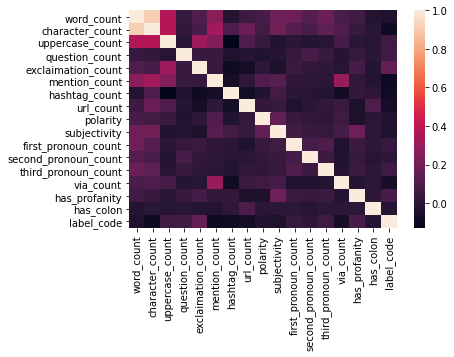

In [8]:
import seaborn as sns
corr = df.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [9]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)
# 'RdBu_r' & 'BrBG' are other good diverging colormaps

limit_output extension: Maximum message size of 10000 exceeded with 58310 characters

In [10]:
type(corr)

pandas.core.frame.DataFrame

In [11]:
c1 = corr.abs().unstack().drop_duplicates()
l = c1.sort_values(ascending = False)

In [12]:
l

word_count       word_count              1.000000
                 character_count         0.912242
character_count  uppercase_count         0.377396
word_count       uppercase_count         0.366634
character_count  mention_count           0.325662
                                           ...   
url_count        second_pronoun_count    0.001921
hashtag_count    first_pronoun_count     0.001615
mention_count    third_pronoun_count     0.000508
uppercase_count  has_profanity           0.000354
polarity         has_colon               0.000007
Length: 137, dtype: float64

In [13]:
def sort_correlation_matrix(correlation_matrix):
    cor = correlation_matrix.abs()
    top_col = cor[cor.columns[0]][1:]
    top_col = top_col.sort_values(ascending=False)
    ordered_columns = [cor.columns[0]] + top_col.index.tolist()
    return correlation_matrix[ordered_columns].reindex(ordered_columns)

In [14]:
sort_correlation_matrix(corr)

,word_count,character_count,uppercase_count,mention_count,first_pronoun_count,subjectivity,third_pronoun_count,second_pronoun_count,exclaimation_count,via_count,polarity,has_profanity,url_count,question_count,label_code,has_colon,hashtag_count
word_count,1.000000,0.912242,0.366634,0.260936,0.192145,0.191638,0.184958,0.124173,0.108327,0.095639,0.085700,0.063786,0.052719,0.034658,-0.031050,-0.021015,-0.017964
character_count,0.912242,1.000000,0.377396,0.325662,0.127013,0.194919,0.146984,0.092440,0.085768,0.102010,0.071777,0.039788,0.180023,0.025324,-0.081363,-0.003247,0.103187
uppercase_count,0.366634,0.377396,1.000000,0.243035,0.002079,-0.024783,-0.005579,-0.013747,0.313318,0.083772,0.042099,-0.000354,0.101391,-0.008390,0.059209,-0.010768,-0.127753
mention_count,0.260936,0.325662,0.243035,1.000000,0.014271,0.121555,0.000508,0.012510,0.043951,0.300464,0.106442,0.018115,0.012858,0.042077,-0.090166,-0.019398,-0.064048
first_pronoun_count,0.192145,0.127013,0.002079,0.014271,1.000000,0.063987,0.102661,0.079829,0.044891,-0.034905,0.042324,0.046024,-0.032888,0.031915,0.038118,0.006059,0.001615
subjectivity,0.191638,0.194919,-0.024783,0.121555,0.063987,1.000000,0.029991,0.040218,-0.041342,0.078217,0.157215,0.189771,0.031502,-0.013683,-0.035702,0.007862,0.074282
third_pronoun_count,0.184958,0.146984,-0.005579,0.000508,0.102661,0.029991,1.000000,0.053045,0.011917,-0.018855,0.016759,0.046816,0.019594,0.043278,0.058980,0.006140,-0.017750
second_pronoun_count,0.124173,0.092440,-0.013747,0.012510,0.079829,0.040218,0.053045,1.000000,0.021486,-0.027086,0.022310,0.036907,-0.001921,0.085986,0.009865,-0.006187,-0.008423
exclaimation_count,0.108327,0.085768,0.313318,0.043951,0.044891,-0.041342,0.011917,0.021486,1.000000,-0.011615,0.010438,0.077036,-0.062018,0.039871,0.159580,-0.013873,-0.082681
via_count,0.095639,0.102010,0.083772,0.300464,-0.034905,0.078217,-0.018855,-0.027086,-0.011615,1.000000,0.060544,-0.014165,0.045159,-0.015434,-0.060001,0.005401,-0.074939


In [15]:
corr['label_code'].sort_values()

mention_count          -0.090166
character_count        -0.081363
hashtag_count          -0.075521
url_count              -0.061774
via_count              -0.060001
subjectivity           -0.035702
word_count             -0.031050
polarity               -0.022699
has_colon              -0.016834
second_pronoun_count    0.009865
first_pronoun_count     0.038118
third_pronoun_count     0.058980
uppercase_count         0.059209
question_count          0.063545
has_profanity           0.085603
exclaimation_count      0.159580
label_code              1.000000
Name: label_code, dtype: float64

In [16]:
df['pronoun_count'] = df['first_pronoun_count'] + df['second_pronoun_count'] + df['third_pronoun_count']

In [17]:
corr = df.corr()

In [18]:
corr['label_code'].sort_values()

mention_count          -0.090166
character_count        -0.081363
hashtag_count          -0.075521
url_count              -0.061774
via_count              -0.060001
subjectivity           -0.035702
word_count             -0.031050
polarity               -0.022699
has_colon              -0.016834
second_pronoun_count    0.009865
first_pronoun_count     0.038118
third_pronoun_count     0.058980
uppercase_count         0.059209
pronoun_count           0.061385
question_count          0.063545
has_profanity           0.085603
exclaimation_count      0.159580
label_code              1.000000
Name: label_code, dtype: float64

<AxesSubplot:>

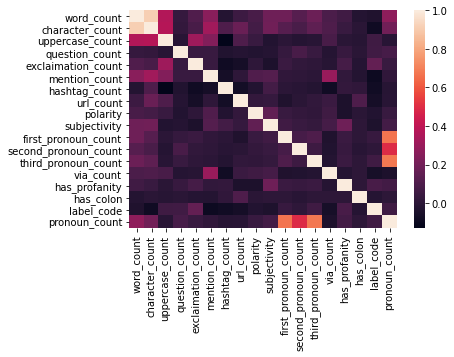

In [19]:
import seaborn as sns
corr = df.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [20]:
df['sub_polar'] = df['subjectivity'] + df['polarity']

In [21]:
corr = df.corr()

In [22]:
corr['label_code'].sort_values()

mention_count          -0.090166
character_count        -0.081363
hashtag_count          -0.075521
url_count              -0.061774
via_count              -0.060001
sub_polar              -0.039185
subjectivity           -0.035702
word_count             -0.031050
polarity               -0.022699
has_colon              -0.016834
second_pronoun_count    0.009865
first_pronoun_count     0.038118
third_pronoun_count     0.058980
uppercase_count         0.059209
pronoun_count           0.061385
question_count          0.063545
has_profanity           0.085603
exclaimation_count      0.159580
label_code              1.000000
Name: label_code, dtype: float64

<AxesSubplot:>

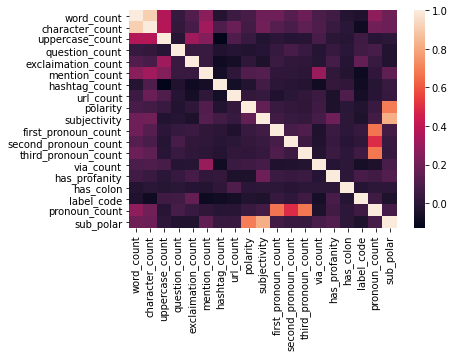

In [23]:
corr = df.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [24]:
df2 = df[['label_code', 'exclaimation_count']]
df2.groupby('label_code').mean()

,exclaimation_count
label_code,
0,0.238998
1,0.594833


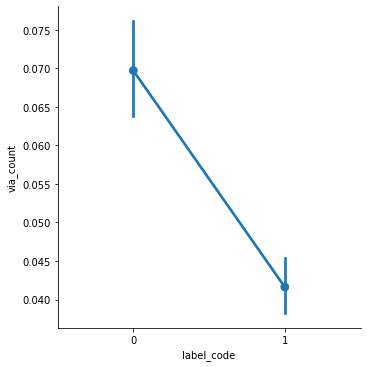

In [25]:
df2 = df[['label_code', 'via_count']]
import seaborn as sns
sns.catplot(y='via_count', x='label_code', data=df2, kind='point', aspect=1, )

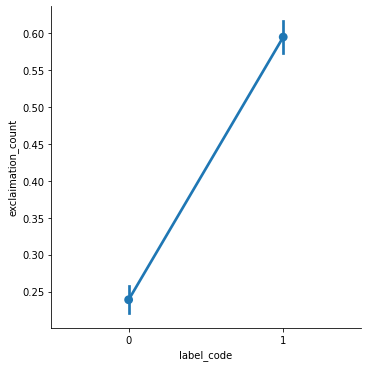

In [27]:
df2 = df[['label_code', 'exclaimation_count']]
import seaborn as sns
sns.catplot(y='exclaimation_count', x='label_code', data=df2, kind='point', aspect=1, )

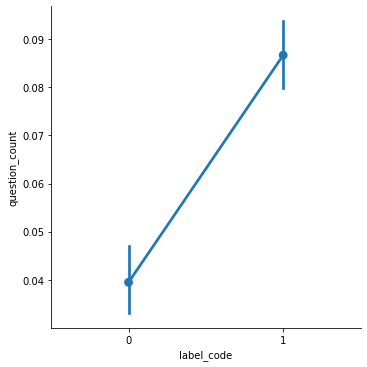

In [28]:
df2 = df[['label_code', 'question_count']]
import seaborn as sns
sns.catplot(y='question_count', x='label_code', data=df2, kind='point', aspect=1, )

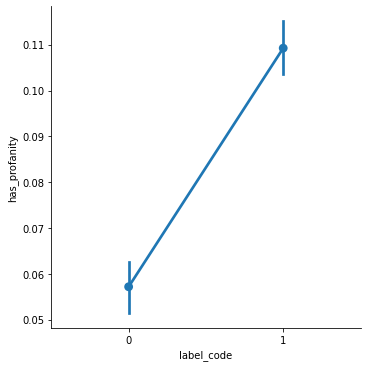

In [29]:
df2 = df[['label_code', 'has_profanity']]
import seaborn as sns
sns.catplot(y='has_profanity', x='label_code', data=df2, kind='point', aspect=1, )